# Exploratory Data Analysis 
Exploratory data analysis is performed on Mock dataset for surgical operation which is similar to the real dataset.
This contains surgery related features where exploratory data analysis on the dataset is done to get more information and to see the distributions of the feature variables and how they are correlated with the target `'blood loss'`.
 
Detail description about few features that are being used are

ICD is the foundation for the identification of health trends and statistics globally, and the international standard for reporting diseases and health conditions.
These are diagnostic codes that create a uniform vocabulary for describing the causes of injury, illness and death. ICD codes are used to represent a doctor’s diagnosis and the patient’s condition. 

OPCS Classification of Interventions and Procedures version 4,[1] is the procedural classification used by clinical coders. OPCS codifies operations, procedures and interventions performed during in-patient stays, day case surgery and some out-patient treatments in NHS hospitals. 

The ASA physical status classification system is a system for assessing the fitness of patients before surgery.

Preoperative antibiotic prophylaxis is defined as the administration of antibiotics prior to performing surgery to help decrease the risk of postoperative infections. The routine administration of prophylactic antibiotics is standard in cases in which a patient will have an artificial implant or foreign body implanted as part of the procedure, in bone grafting procedures, and other surgeries in which large dissections and higher amounts of anticipated blood loss is expected. Antibiotics should be given within 30 to 60 minutes of a surgical incision.
 


In [1]:
import sys 
print("Python version: {}". format(sys.version))

import pandas as pd 
print("pandas version: {}". format(pd.__version__))

import matplotlib 
print("matplotlib version: {}". format(matplotlib.__version__))

import seaborn
print("seaborn version: {}". format(seaborn.__version__))

import numpy as np 
print("NumPy version: {}". format(np.__version__))

import scipy as sp 
print("SciPy version: {}". format(sp.__version__))  

import missingno as msno
print("Missingno version: {}". format(msno.__version__)) 

import IPython
from IPython import display 
print("IPython version: {}". format(IPython.__version__)) 

import sklearn 
print("scikit-learn version: {}". format(sklearn.__version__))

Python version: 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
pandas version: 0.25.1
matplotlib version: 3.1.1
seaborn version: 0.9.0
NumPy version: 1.16.5
SciPy version: 1.3.1
Missingno version: 0.4.2
IPython version: 7.8.0
scikit-learn version: 0.21.3


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

# Ignore Warning in IPython
import warnings
warnings.filterwarnings('ignore')

Loaded the sample_data_v2.csv mock dataset

In [3]:
data = pd.read_csv("sample_data_v2.csv")

In [4]:
data.head(5)

,age,gender,weight (kg),allergy,year,ASA,ICD10,OPCS,antibiotic_time,operation_start_time,previous_surgery,surgery_time,operation_time,blood loss (ml)
0,54-63,F,87.0,NaN,2005,NaN,D14,C02,NaN,23:16:39,True,NaN,01:27:28,154
1,64-72,M,NaN,NaN,2006,NaN,G45,C38,NaN,23:35:50,False,00:30:29,01:02:08,198
2,73-95,F,64.0,NaN,2014,NaN,G17,A26,NaN,15:54:01,True,NaN,00:45:20,542
3,73-95,M,110.0,NaN,2009,3.0,B53,H35,NaN,06:44:32,False,00:32:14,00:56:28,199
4,18-41,F,NaN,NaN,2009,NaN,G84,L33,NaN,01:31:31,False,00:18:46,01:14:38,156


In [5]:
data.shape

(10000, 14)

It could be seen that there are 10000 entries and there are missing values in weight (kg) ,allergy, ASA, antibiotic_time, surgery_time

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
age                     10000 non-null object
gender                  10000 non-null object
weight (kg)             8112 non-null float64
allergy                 158 non-null object
year                    10000 non-null int64
ASA                     6707 non-null float64
ICD10                   10000 non-null object
OPCS                    10000 non-null object
antibiotic_time         2012 non-null object
operation_start_time    10000 non-null object
previous_surgery        10000 non-null bool
surgery_time            8002 non-null object
operation_time          10000 non-null object
blood loss (ml)         10000 non-null int64
dtypes: bool(1), float64(2), int64(2), object(9)
memory usage: 1.0+ MB


In [7]:
data.isnull().sum()

age                        0
gender                     0
weight (kg)             1888
allergy                 9842
year                       0
ASA                     3293
ICD10                      0
OPCS                       0
antibiotic_time         7988
operation_start_time       0
previous_surgery           0
surgery_time            1998
operation_time             0
blood loss (ml)            0
dtype: int64

In the Statistics for numerical values, it could be see that for the column `['weight (kg)']` there are some outliers as the minimum and maximum values are two extreme values and there are not within reasonable range.

In [8]:
data.describe()

,weight (kg),year,ASA,blood loss (ml)
count,8112.000000,10000.000000,6707.000000,10000.000000
mean,81.857249,2011.527800,3.796779,275.587500
std,84.721859,4.335678,1.248561,242.598927
min,-1.000000,2004.000000,1.000000,-25.000000
25%,55.000000,2008.000000,3.000000,130.000000
50%,76.000000,2012.000000,4.000000,196.000000
75%,98.000000,2015.000000,5.000000,337.250000
max,1300.000000,2019.000000,6.000000,2983.000000


In [9]:
data.nunique()

age                        7
gender                     2
weight (kg)              155
allergy                  101
year                      16
ASA                        6
ICD10                    701
OPCS                    1199
antibiotic_time         1977
operation_start_time    9418
previous_surgery           2
surgery_time            3814
operation_time          4608
blood loss (ml)         1071
dtype: int64

There are no duplicate entries in the dataset and all of them are unique

In [10]:
data.duplicated().sum()

0

In [11]:
#data_ICD = pd.read_csv("ICD10_categories.csv", names=["ICD_Code","ICD_Desc"])
data_ICD = pd.read_csv("ICD10_categories.csv", header=None)
data_OPS = pd.read_csv("OPCS4_FullCodeList.csv", header=None, usecols=[0, 1])

In [12]:
data_OPS.iloc[:, 0] = data_OPS.iloc[:, 0].apply(lambda x: x.split('.')[0])
data_OPS_dict = data_OPS.to_dict()[0]

In [13]:
data_ICD.iloc[:, 1] = data_ICD.iloc[:, 1].apply(lambda x: x.upper())
data_ICD_dict = data_ICD.to_dict()[0]

In [14]:
def is_Valid_code(value, referenceDict):
    """
    function to  check given code is a valid code or not and
    replacing it with nan if invalid
    """
    if value in referenceDict.values():
        return value
    else:
        print(value)
        return np.nan

In [15]:
data['ICD10'] = data['ICD10'].apply(lambda x: is_Valid_code(x, data_ICD_dict))
data['OPCS'] = data['OPCS'].apply(lambda x: is_Valid_code(x,data_OPS_dict))

G17
G84
E18
G42
A13
A13
B13
D96
F77
G68
A73
G39
G16
A16
D79
C89
E93
B12
E12
G39
A97
B13
F85
G39
C89
E48
F56
C89
B28
E94
C35
D54
C59
G18
B63
G75
F56
F57
F37
B21
E81
C97
E82
G39
F97
E19
B28
G19
A62
E90
F37
F85
E12
F85
A62
B84
G69
B12
D54
G88
F26
F49
B12
F62
F58
G34
A12
D94
A61
F46
E14
E92
A11
C98
C98
D95
G41
E57
F36
D79
F26
F75
D96
B32
B61
E33
C87
E39
E33
F37
G28
D85
G28
E92
D92
B28
G27
F97
F35
F08
G18
A76
E81
F92
F77
A11
E95
F85
G68
C29
D97
A73
D08
F77
B63
E62
E92
D97
E33
A16
E14
F76
C97
C59
D95
D88
D79
C42
D08
B24
F56
B84
E62
D99
G33
F38
B11
G33
F76
D96
F97
F74
F96
E17
G42
C27
G88
G42
A11
F97
F57
B21
G34
E92
D87
E19
D98
A72
F76
A10
F58
G33
D97
B98
G33
C59
F62
G86
F86
F46
C97
E18
E98
B63
G39
A97
D54
E14
A61
G78
B22
F36
E48
A45
A62
D96
F47
A16
G41
E37
B24
A10
E81
F74
D95
G28
G27
F86
G28
E62
E49
C36
G84
F62
F92
B24
G75
D91
G85
A29
F86
B24
F36
E92
D96
F46
B21
F96
G16
G67
E17
D98
D08
E49
G18
D90
E37
C36
E94
G69
E91
E33
D91
A16
B28
F58
G75
G69
G49
A97
E49
D79
E18
B24
C42
E38
B14
G41
B22
D85


G67
B61
G34
G78
G88
B98
G79
B84
C99
D54
F62
D87
E90
F74
F27
G15
C35
D94
A72
D96
G68
B13
G77
A73
G76
B22
G22
F58
B23
D99
F62
D93
F58
F96
C27
C38
F77
H64
F69
B86
B51
B26
D57
G98
C58
A37
J92
D18
H71
I71
A37
E72
D31
F33
E82
D78
E60
G94
C58
A86
F91
K82
A88
I33
H74
D55
D64
I71
I00
I93
I16
H97
I43
D38
H96
H79
D64
L15
I98
I32
F81
I47
D44
C36
J88
D35
A92
K96
J83
E00
A58
B90
L15
D86
K97
K84
D86
G94
F78
E88
C30
J93
I47
D45
D64
J84
D35
G94
C50
I06
G90
B43
F96
F31
C95
I66
F85
D58
A94
C28
I74
B70
F37
D43
F89
I73
C93
K03
H38
D73
B73
H80
I31
D32
F77
D88
D27
H82
D69
I96
D60
H89
D75
H98
I05
B67
K97
D40
D64
E76
H82
C94
H85
D46
I13
I59
I43
B83
B68
I24
B82
J95
H76
E77
I05
A21
H91
C63
H72
D96
I44
J95
I86
I35
D74
D84
B87
F92
E75
B67
I16
D54
D09
A98
B79
J91
I03
B66
I95
J85
J86
D72
D72
L00
G56
C50
D21
A72
I71
I94
G22
I09
I40
D37
F65
C70
B88
I58
D87
D92
C36
D87
I67
D57
I89
B24
F31
E74
G88
J93
I54
F81
A89
A95
K70
E18
H88
I64
A96
K93
B63
I40
F72
J93
A91
I25
D58
I49
K92
K95
I29
H67
F68
F21
J85
D84
D84
H74
I42
D95


J86
H93
F77
B67
D74
I03
B78
H85
L40
B03
F47
D60
H92
B45
B64
A23
D40
I67
B46
I73
A92
J00
D63
G93
A50
I76
J22
I56
I14
D87
D34
I50
A93
I84
I48
H91
J84
L15
F57
I14
F54
F90
H80
F19
K39
E32
A94
H88
D31
I48
K21
C70
F77
H73
I84
H38
A74
J98
F07
G93
E86
A95
I66
B66
J71
K03
F82
K91
G93
K03
B84
B62
D62
C21
J91
D51
F85
D97
A35
I24
J71
J84
G83
B24
D83
E56
K89
A58
A98
J78
C70
H89
D36
G97
B15
J86
D86
E81
F68
I51
B67
J71
I96
E82
C93
I96
B54
D29
F98
B73
K89
J81
A58
I07
A80
I30
F84
D85
L17
L64
A97
A80
D64
D41
K86
A46
I10
K94
H90
C97
H39
A72
I71
G95
D97
K97
H81
B66
G86
D31
F96
I42
F00
B98
J81
I74
E45
L55
B82
H80
F88
B46
K91
I96
G84
E71
H82
K21
I50
L32
F94
B05
A87
D85
J75
D60
B99
B79
F35
I80
B74
B51
I43
K82
D94
B46
E78
H92
D34
F70
F72
A90
F65
G56
I01
F98
H90
F80
K82
I96
F90
I50
B87
I48
B26
B43
B78
H73
A21
F70
B72
D56
D75
A80
B90
G92
D79
F91
I55
H89
E78
G83
C28
I59
J91
I47
I77
D46
F27
I00
I28
F88
F47
J86
J94
H45
F21
J92
G97
B24
D11
B98
I07
I09
B45
I04
H65
E56
J92
H43
J90
J64
B55
F64
I87
I79
B07
A89
I60
F31


In [16]:
import re
def is_Valid_code_format(value):
    """
    function to  check given code is a valid code or not and
    replacing it with nan if invalid
    """
    if re.match(r'([A-Z])\d{2}', value):
        return value
    else:
        return np.nan

In [17]:
data['ICD10'] = data['ICD10'].dropna().apply(lambda x: is_Valid_code_format(x))
data['OPCS'] = data['OPCS'].dropna().apply(lambda x: is_Valid_code_format(x))

In [18]:

cat_col = ['gender', 'previous_surgery']

for col in cat_col:
    print("{}:{}".format(col, data[col].unique()))

gender:['F' 'M']
previous_surgery:[ True False]


In [19]:
def RemoveOutlieres(data, column):
    ul = np.percentile(data[column],99)
    ll = np.percentile(data[column], 1)
    data.loc[data[column] > ul * 3, column] =  ul * 3
    data.loc[data[column] < ll * .3, column] =  ll * .3

In [20]:
def check_and_remove_invalid_numbers(
        value: int,
        min_allowed: int,
        max_allowed: int
) -> int:
    """
    a simple function that check if an entry is within accepted range and
    replacing it with nan if invalid
    """
    try:
        if max_allowed >= value >= min_allowed:
            return value
        return np.nan
    except TypeError:
        return value

In [21]:
def check_time_format(value):
    """
    function to  check whether the time format is h:m:s range and
    replacing it with nan if invalid
    """
    x = value.split(':')
    if len(x) == 3 :
        return x[0]+':'+ x[1] + ':' + x[2]
    return np.nan

In [22]:
 data[data['blood loss (ml)'] < 0]

,age,gender,weight (kg),allergy,year,ASA,ICD10,OPCS,antibiotic_time,operation_start_time,previous_surgery,surgery_time,operation_time,blood loss (ml)
2651,73-95,F,31.0,NaN,2016,NaN,NaN,D13,NaN,05:49:34,False,00:14:51,01:00:37,-7
2779,54-63,M,55.0,NaN,2014,3.0,D02,NaN,NaN,11:53:42,True,00:08:53,00:10:09,-22
3837,64-72,M,20.0,NaN,2005,NaN,C93,NaN,01:13:03,00:51:01,True,00:11:50,01:05:25,-15
4496,42-53,F,63.0,NaN,2007,3.0,F31,H09,NaN,09:55:13,False,00:07:55,00:59:42,-7
5056,42-53,F,25.0,NaN,2018,NaN,F52,NaN,NaN,06:59:07,True,00:12:16,00:53:10,-25
5413,73-95,F,41.0,NaN,2014,3.0,NaN,NaN,NaN,16:35:57,False,00:16:30,00:41:50,-22
5543,73-95,F,53.0,NaN,2007,2.0,NaN,NaN,NaN,16:40:32,False,00:15:31,00:53:14,-7
5769,73-95,F,25.0,NaN,2006,3.0,C49,NaN,NaN,00:54:57,False,00:12:23,01:07:38,-8
6129,54-63,F,20.0,NaN,2013,2.0,F54,NaN,NaN,11:19:16,False,00:12:28,01:07:31,-20
7782,54-63,M,37.0,NaN,2017,2.0,NaN,NaN,NaN,12:59:01,True,00:19:07,00:34:24,-3


In [23]:
#data['blood loss (ml)'] = data['blood loss (ml)'].apply(lambda x : x if x > 0 else np.nan)
#data['weight (kg)'] = data['weight (kg)'].apply(lambda x : x if x > 0 else np.nan)
data['blood loss (ml)'] = data['blood loss (ml)'].apply(lambda x: check_and_remove_invalid_numbers(x, 0, 5000))
data['weight (kg)'] = data['weight (kg)'].apply(lambda x: check_and_remove_invalid_numbers(x, 0, 500))

In [24]:
data['age'].replace('250',np.nan,inplace=True)
data['age'].replace('-1',np.nan,inplace=True)

In [25]:
data[data['surgery_time'].isna()]

,age,gender,weight (kg),allergy,year,ASA,ICD10,OPCS,antibiotic_time,operation_start_time,previous_surgery,surgery_time,operation_time,blood loss (ml)
0,54-63,F,87.0,NaN,2005,NaN,D14,C02,NaN,23:16:39,True,NaN,01:27:28,154.0
2,73-95,F,64.0,NaN,2014,NaN,NaN,A26,NaN,15:54:01,True,NaN,00:45:20,542.0
7,42-53,M,74.0,NaN,2004,NaN,A48,A12,NaN,08:06:10,True,NaN,00:21:08,321.0
8,73-95,F,67.0,NaN,2005,4.0,B41,G28,NaN,21:47:53,True,NaN,00:20:32,874.0
11,73-95,F,62.0,NaN,2009,NaN,C85,NaN,NaN,15:24:31,False,NaN,01:28:52,293.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,42-53,M,35.0,NaN,2008,NaN,B91,J29,NaN,05:56:31,True,NaN,00:35:15,304.0
9992,73-95,M,NaN,NaN,2011,5.0,NaN,D13,NaN,04:41:42,True,NaN,01:23:45,183.0
9995,73-95,F,86.0,NaN,2011,5.0,D07,NaN,NaN,14:28:06,False,NaN,00:31:00,116.0
9998,73-95,M,92.0,NaN,2011,3.0,A35,NaN,NaN,03:57:15,False,NaN,00:58:49,182.0


In [26]:
#data['surgery_time'] = data['surgery_time'].dropna().str.split(':').apply(lambda x: x[0]+':'+ x[1] + ':' + x[2] if len(x) == 3 else np.nan)
#data['operation_time'] = data['operation_time'].dropna().str.split(':').apply(lambda x: x[0]+':'+ x[1] + ':' + x[2] if len(x) == 3 else np.nan)
#data['operation_start_time'] = data['operation_start_time'].dropna().str.split(':').apply(lambda x: x[0]+':'+ x[1] + ':' + x[2] if len(x) == 3 else np.nan)
data['surgery_time'] = data['surgery_time'].dropna().apply(lambda x: check_time_format(x))
data['operation_time'] = data['operation_time'].dropna().apply(lambda x: check_time_format(x))
data['operation_start_time'] = data['operation_start_time'].dropna().apply(lambda x: check_time_format(x))

There is equal distribution of both male and female entries in the dataset

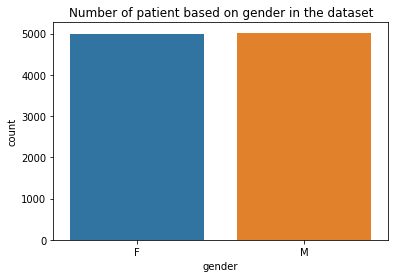

In [27]:
sns.countplot(x='gender', data=data)
plt.title("Number of patient based on gender in the dataset")
plt.show()

Mean blood loss for the complete dataset is 275ml. For male patients it is 281 and for female patients it is 269.
From the results it could be seen from the dataset that there is more blood loss for Male entries compared to female entries which is a useful feature during the prediction of the blood loss.

In [28]:
data[data['gender'] =='F'].describe()

,weight (kg),year,ASA,blood loss (ml)
count,4020.000000,4979.000000,3309.000000,4972.000000
mean,69.011443,2011.544286,3.812934,269.826629
std,28.853223,4.376399,1.251747,251.047703
min,20.000000,2004.000000,1.000000,0.000000
25%,47.000000,2008.000000,3.000000,121.000000
50%,69.000000,2012.000000,4.000000,187.000000
75%,89.000000,2015.000000,5.000000,328.000000
max,169.000000,2019.000000,6.000000,2983.000000


In [29]:
data[data['gender'] =='M'].describe()

,weight (kg),year,ASA,blood loss (ml)
count,4043.000000,5021.000000,3398.000000,5017.000000
mean,84.693297,2011.511452,3.781048,281.928643
std,29.937812,4.295290,1.245433,233.679944
min,20.000000,2004.000000,1.000000,6.000000
25%,63.000000,2008.000000,3.000000,138.000000
50%,85.000000,2012.000000,4.000000,203.000000
75%,105.000000,2015.000000,5.000000,344.000000
max,190.000000,2019.000000,6.000000,2329.000000


In [30]:
mean_M = data[data['gender'] =='M']['blood loss (ml)'].mean()
print("Mean blood loss for Male entries :{}".format(mean_M))
mean_F = data[data['gender'] =='F']['blood loss (ml)'].mean()
print("Mean blood loss for Female entries :{}".format(mean_F))
mean_ALL = data['blood loss (ml)'].mean()
print("Mean blood loss for all the entries :{}".format(mean_ALL))

Mean blood loss for Male entries :281.92864261510863
Mean blood loss for Female entries :269.8266291230893
Mean blood loss for all the entries :275.9048953849234


['54-63' '64-72' '73-95' '18-41' '42-53' nan]


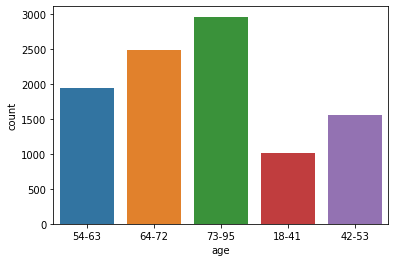

In [31]:
print(data['age'].unique())
sns.countplot(x='age', data=data)


In [32]:
data['blood loss (ml)'].describe()

count    9989.000000
mean      275.904895
std       242.543598
min         0.000000
25%       130.000000
50%       196.000000
75%       338.000000
max      2983.000000
Name: blood loss (ml), dtype: float64

In [33]:
data.groupby('age')['blood loss (ml)'].describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
18-41,1013.0,253.482725,220.101025,7.0,117.0,174.0,322.00,2015.0
42-53,1556.0,267.205656,249.071488,11.0,116.0,173.5,328.25,2017.0
54-63,1938.0,284.459236,273.275237,0.0,130.0,196.0,344.00,2983.0
64-72,2483.0,284.629078,243.981097,6.0,133.5,206.0,348.50,2002.0
73-95,2956.0,275.736130,223.035728,2.0,141.0,205.0,334.00,2685.0


After aggregrating the data with age which create a new dataframe of ages and calculated the mean blood loss for these age groups.From the below results it could be seen that there is more blood loss for the age groups of `42-53` and `54-63` but it is almost equal to the mean of the total dataset whic his 275ml.
Also there is an invalid age group of 250 years.

In [34]:
data.groupby(['age'])['blood loss (ml)'].mean()

age
18-41    253.482725
42-53    267.205656
54-63    284.459236
64-72    284.629078
73-95    275.736130
Name: blood loss (ml), dtype: float64

From the below result is could be seen that allergy is an important feature during prediction of blood loss. For `ALLERGY TO ARTEMISIA VULGARIS` there is a blood loss of 1674 ml followed by `CYPROTERONE ACETATE AND ETHINYLESTRADIOL` with 592ml

In [35]:
data.groupby(['allergy'])['blood loss (ml)'].mean()

allergy
ACRIDINE AZO DISINFECTANT DYE                91.0
ADENOSINE                                    96.0
ALBUMIN SOLUTION                            182.0
ALLERGIC DISORDER OF RESPIRATORY SYSTEM     241.0
ALLERGY TO ARTEMISIA VULGARIS              1674.0
                                            ...  
TRYPTOPHAN                                 1311.0
TULOBUTEROL                                 295.0
VENLAFAXINE,  PRAZEPAM                      604.0
VERAPAMIL                                   373.0
XYLOMETAZOLINE                              169.0
Name: blood loss (ml), Length: 101, dtype: float64

After aggregrating based on `[ASA], [ICD10], [OPCS]` the mean value of blood loss provides few outputs which could be useful during the predction of blood loss.
From the result based on the phycical status which is defined by `ASA` comparted to 1 and 2 which could be consired as healthy there is less blood less than others. Same with `[ICD10], [OPCS]` where for few codes there is more blood loss than others.

In [36]:
print("Blood loss after aggregrating ASA physical status classification system: {}\n".format(data.groupby(['ASA'])['blood loss (ml)'].mean()))
print("Blood loss after aggregrating ICD codes: {}\n".format(data.groupby(['ICD10'])['blood loss (ml)'].mean()))
print("Blood loss after aggregrating Classification of Interventions and Procedures: {}".format(data.groupby(['OPCS'])['blood loss (ml)'].mean()))

Blood loss after aggregrating ASA physical status classification system: ASA
1.0    119.899083
2.0    129.746032
3.0    217.088539
4.0    337.059579
5.0    335.302785
6.0    349.909884
Name: blood loss (ml), dtype: float64

Blood loss after aggregrating ICD codes: ICD10
A00     282.625000
A01     402.941176
A02     357.375000
A03     337.125000
A04     302.625000
           ...    
G96     276.250000
G97     352.153846
G98     469.333333
G99     295.571429
T200    252.194444
Name: blood loss (ml), Length: 553, dtype: float64

Blood loss after aggregrating Classification of Interventions and Procedures: OPCS
A01    331.625000
A02    251.875000
A03    319.222222
A04    288.500000
A05    257.384615
          ...    
L95    268.125000
L96    323.000000
L97    334.000000
L98    259.000000
L99    271.428571
Name: blood loss (ml), Length: 682, dtype: float64


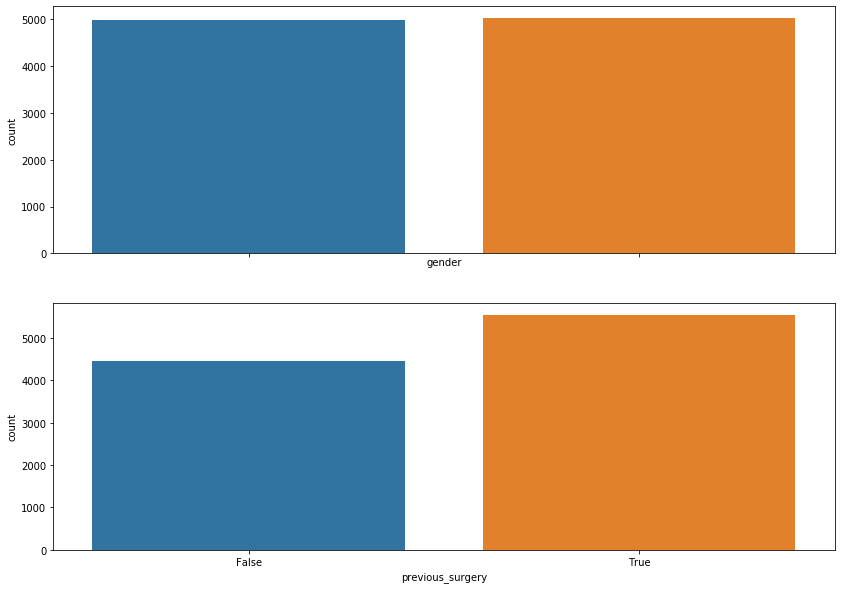

In [37]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize =(14,10) )
sns.countplot(x='gender', data=data, ax=ax1)
sns.countplot(x='previous_surgery', data=data, ax=ax2)
plt.show()

Now performing EDA on numerical variables `['blood loss (ml)', 'weight (kg)', 'operation_time_minutes']`

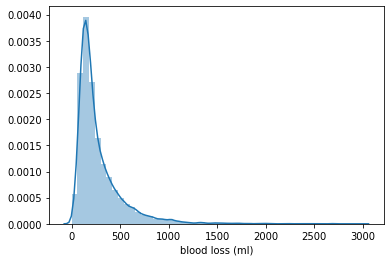

In [38]:
sns.distplot(data['blood loss (ml)'].dropna())

Clearly from the figures and stats it could be seen that for ASA value of 3,4,5 there is more blood loss compared to others.
If antibiotics is given then there is more blood loss as the mean value is 285 ml compare to 273ml of blood loss when no antibiotics are given. So `['ASA and antibiotic_time]` are very useful during prediction of blood loss.

In [39]:
#sns.swarmplot(x='ASA',y='blood loss (ml)',data=data,hue='gender')

In [40]:
data[data.antibiotic_time.isna() == False]['blood loss (ml)'].describe()

count    2011.000000
mean      285.391845
std       257.688295
min         8.000000
25%       132.000000
50%       201.000000
75%       349.000000
max      2384.000000
Name: blood loss (ml), dtype: float64

In [41]:
data[data.antibiotic_time.isna() == True]['blood loss (ml)'].describe()

count    7978.000000
mean      273.513537
std       238.531842
min         0.000000
25%       129.000000
50%       194.500000
75%       334.000000
max      2983.000000
Name: blood loss (ml), dtype: float64

There are some outliers in `weight` feature which might needs to be taken care of as they will effect the mean values.

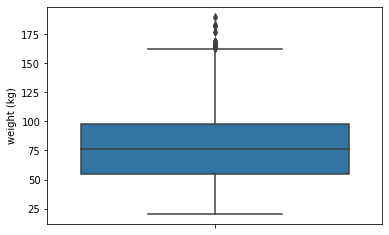

In [42]:
sns.boxplot(y="weight (kg)",data=data)

# Pattern of missing data
From the below bar graph it could be see that `['weight','allergy','ASA','antibiotic_time','surgery_time']` have missing values and 'allergy' contain the most number of missing values.

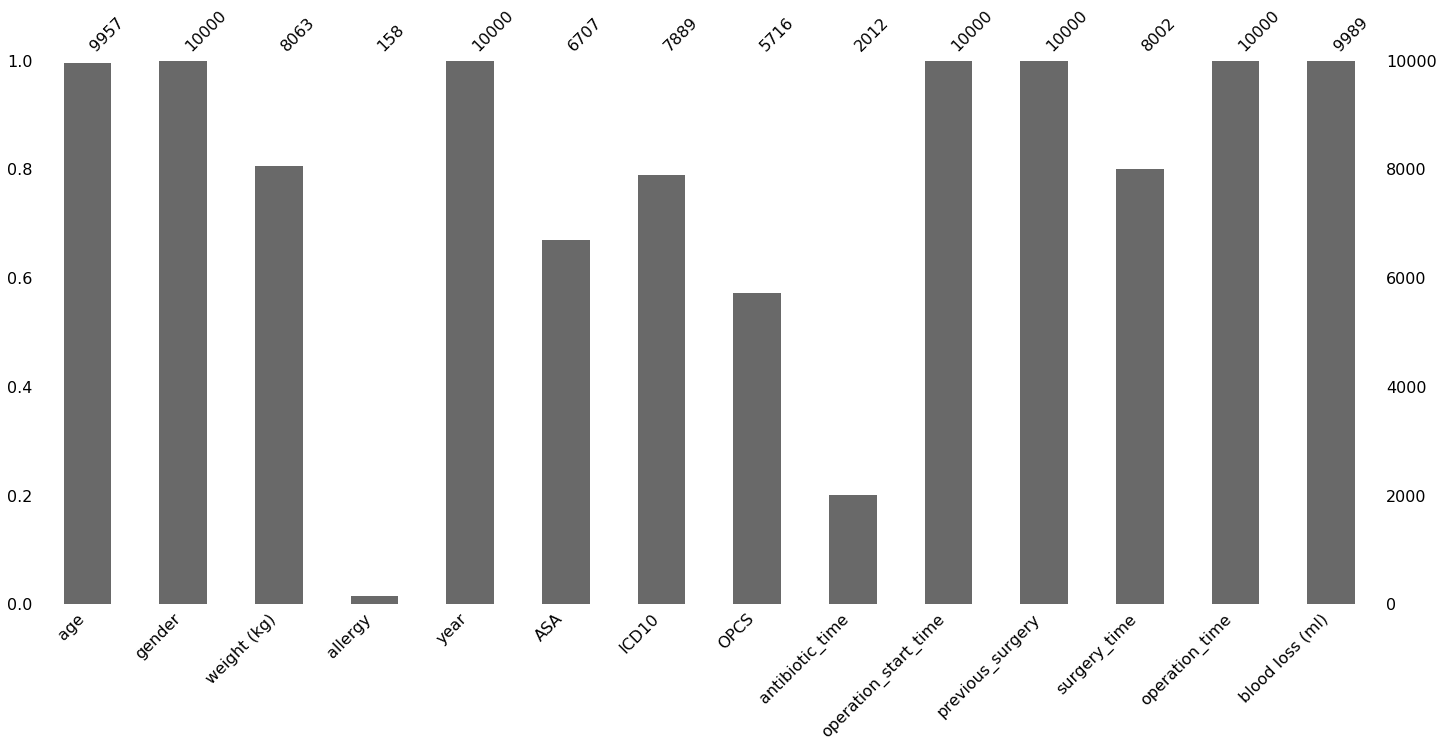

In [43]:
msno.bar(data)


Using this matrix it helps to find the pattern of missingness in the dataset. In features `weight,ASA,surgery_time` has similar pattern for missing values where as allergy shows a different pattern.

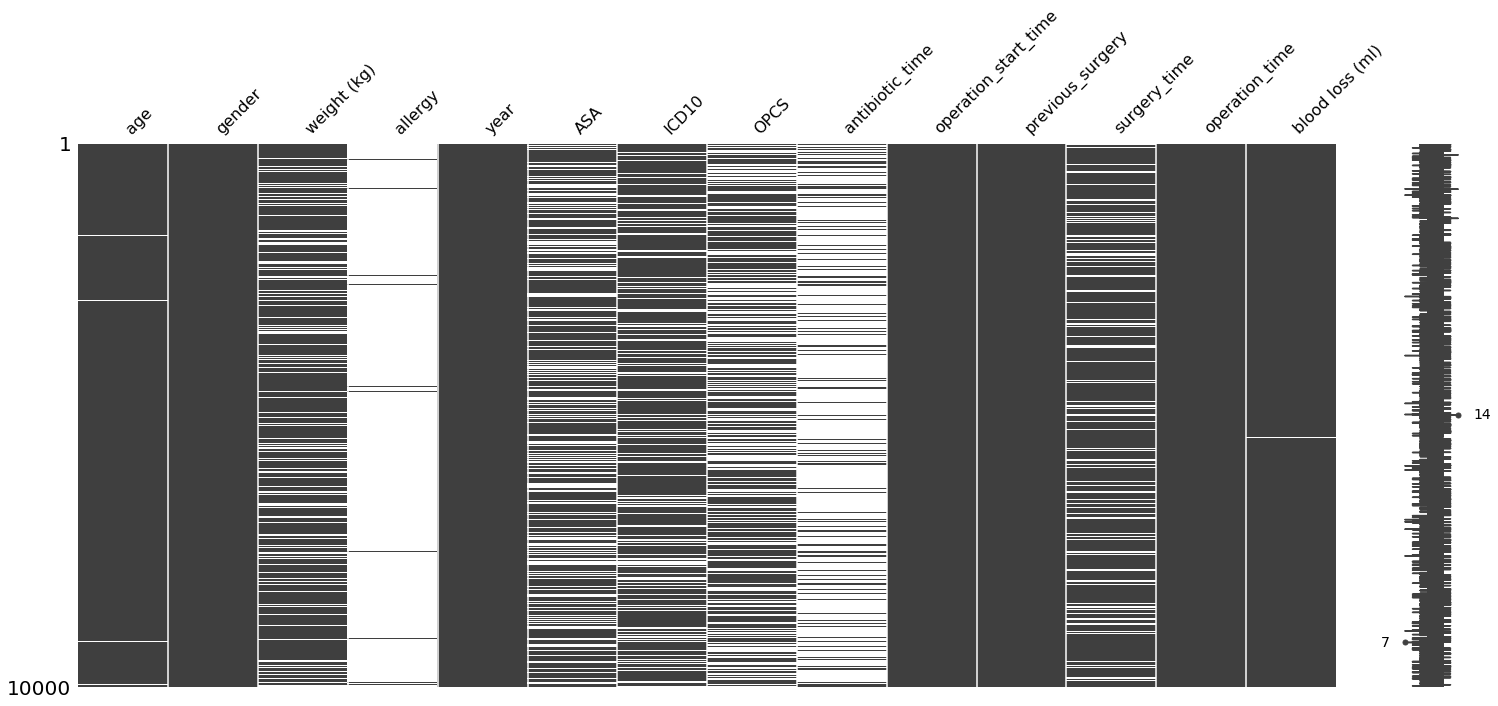

In [44]:
msno.matrix(data)

 Heatmap shows the correlation of missingness between every 2 columns.
A value near -1 means if one variable appears then the other variable is very likely to be missing. A value near 0 means there is no dependence between the occurrence of missing values of two variables. A value near 1 means if one variable appears then the other variable is very likely to be present.

Below it could be seen that there is no dependence between the occurrence of missing values of two variables.

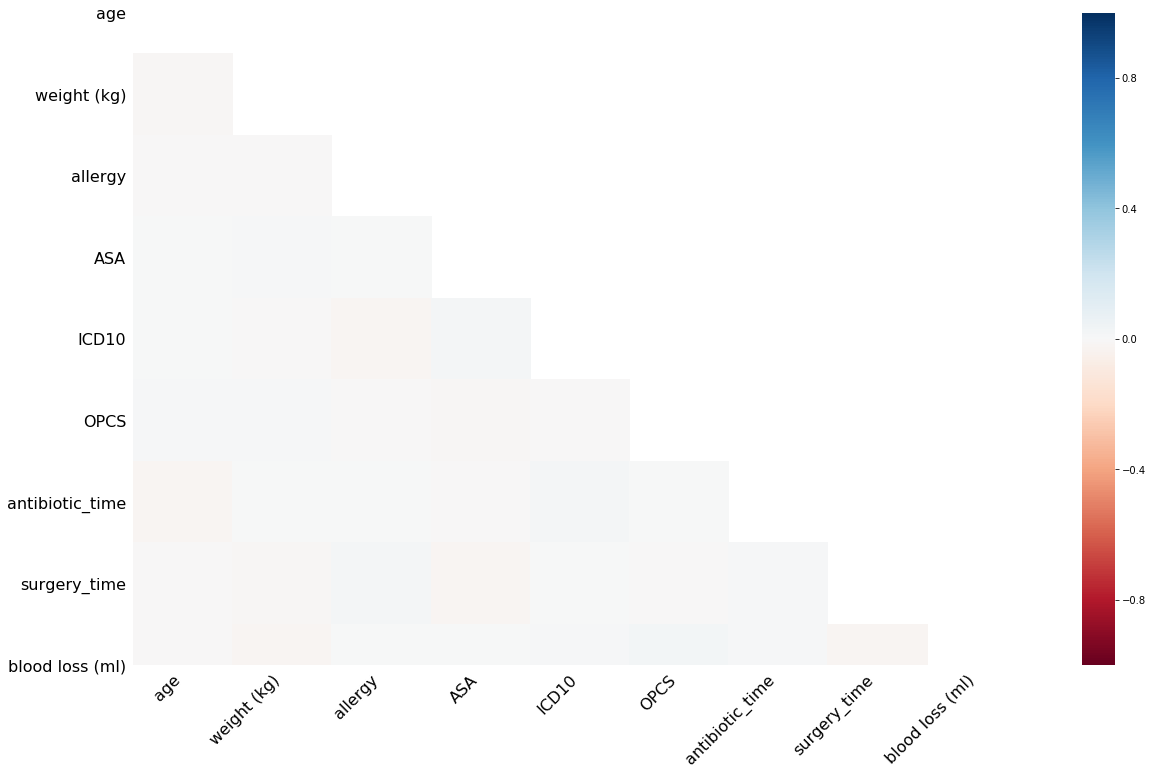

In [45]:
msno.heatmap(data) 

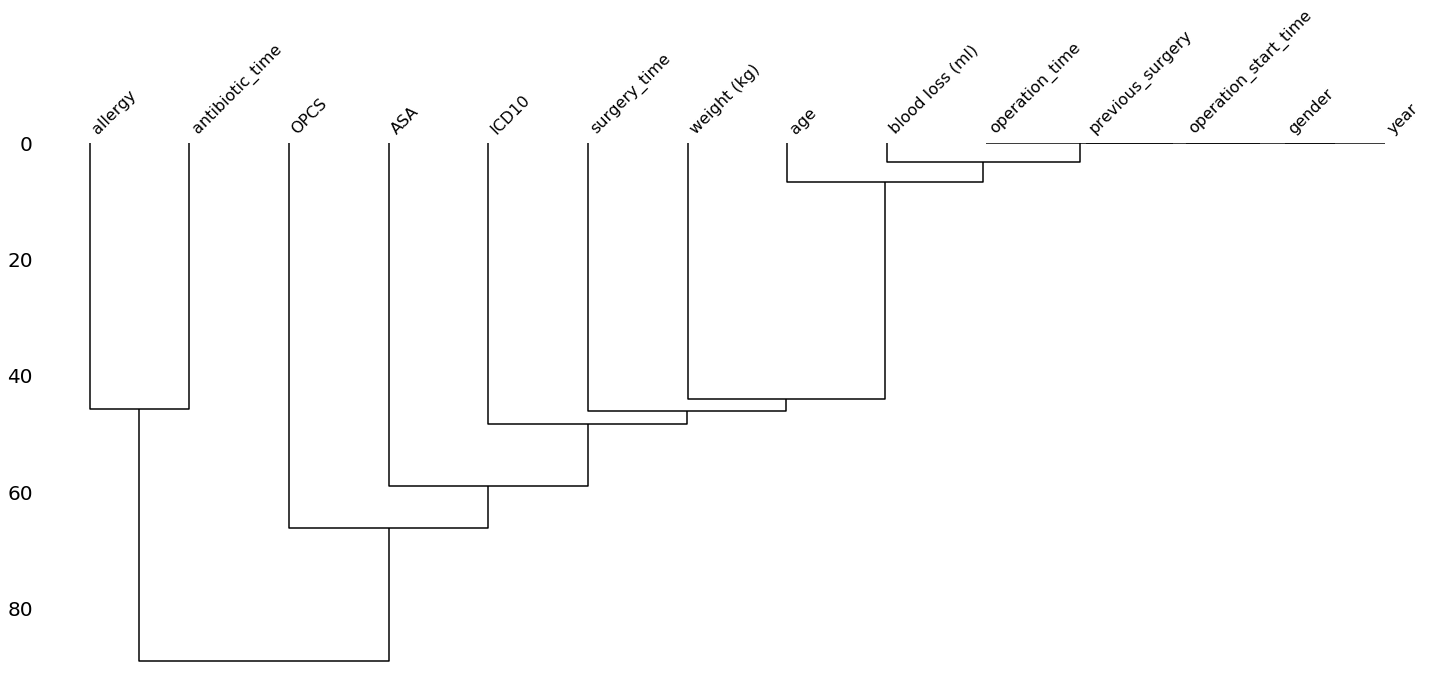

In [46]:
msno.dendrogram(data)

In [47]:
def convert_time_to_minutes(value):
    """
    function to  convert time format is h:m:s into
    minutes
    """
    x = value.split(':')
    return int(x[0]) * 60 + int(x[1])

In [48]:
#data['operation_time'] = data['operation_time'].apply(convert_to_minutes)
#data['operation_time_minutes'] = data['operation_time'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
#data['surgery_time_minutes'] = data['surgery_time'].dropna().str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
data['operation_time_minutes'] = data['operation_time'].apply(lambda x: convert_time_to_minutes(x))
data['surgery_time_minutes'] = data['surgery_time'].dropna().apply(lambda x: convert_time_to_minutes(x))

No strong relation or information could be observed between the `operation time` and the `blood loss`. The distribution of blood loss during operation are relatively similar no matter what the operation time is. But there are few points which are very less in number where the longer the operation time is more the blood loss.

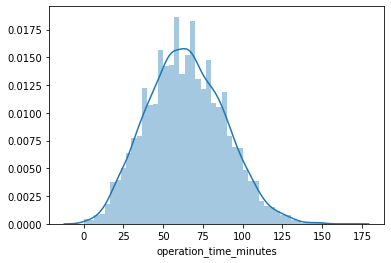

In [49]:
sns.distplot(data['operation_time_minutes'])

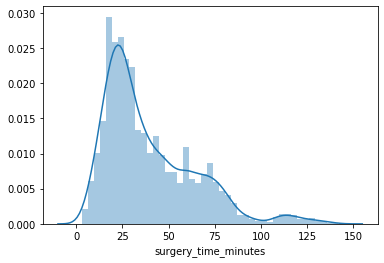

In [50]:
sns.distplot(data['surgery_time_minutes'].dropna())

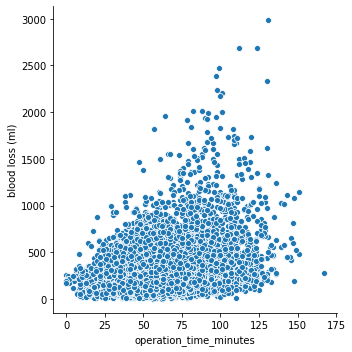

In [51]:
sns.relplot(x='operation_time_minutes',y='blood loss (ml)',data=data)

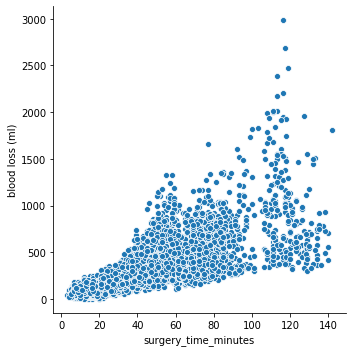

In [52]:
sns.relplot(x='surgery_time_minutes',y='blood loss (ml)',data=data)

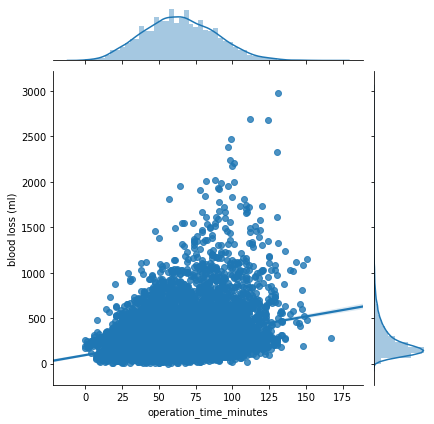

In [53]:
sns.jointplot(x='operation_time_minutes', y='blood loss (ml)',data=data,kind='reg')

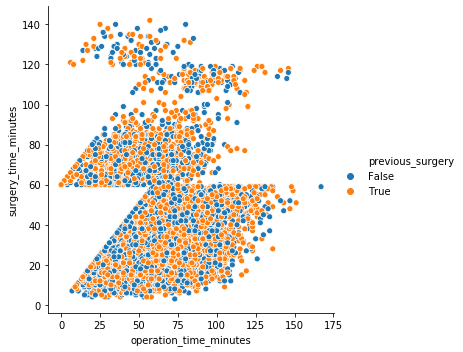

In [54]:
sns.relplot(x='operation_time_minutes', y='surgery_time_minutes',hue = 'previous_surgery', data=data)

From the heatmap it could be seen that `[previous surgery, ASA, Operation time]` are the most correlated features with the blood loss.

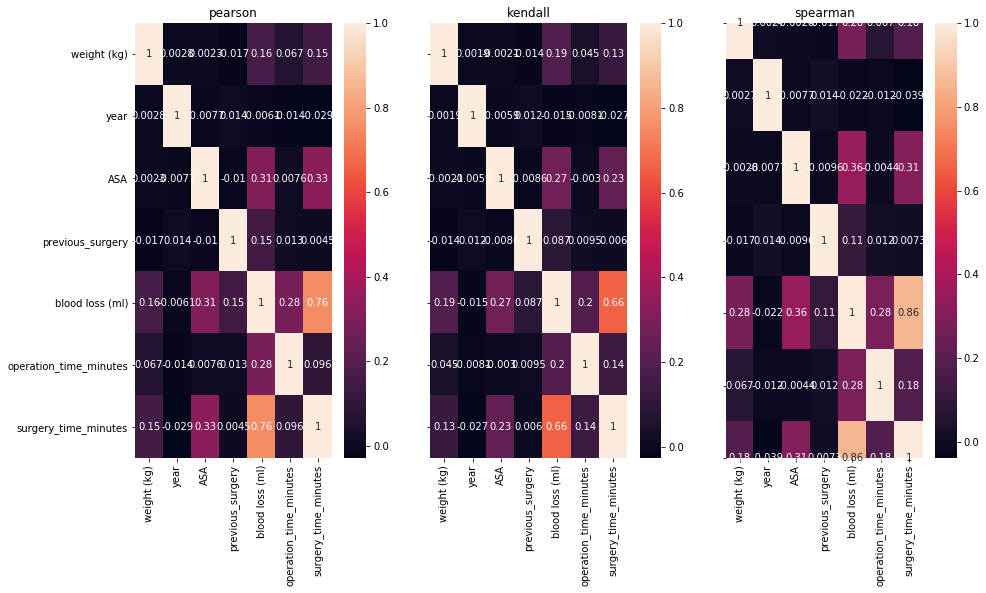

In [55]:
corr_type = ['pearson', 'kendall', 'spearman']
fig, ax = plt.subplots(ncols=3, sharey=True, figsize =(15,8) )
i=0
for corr in corr_type:
    df_corr = data.corr(method=corr)
    sns.heatmap(df_corr, annot=True,ax=ax[i])
    ax[i].set_title(corr)
    i+=1

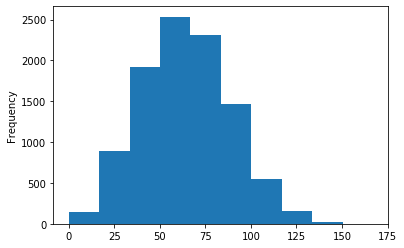

In [56]:
data.operation_time_minutes.plot(kind='hist')

Creating bin for operation time and surgery time

In [57]:
# Bin the operation_time variable into different groups
time_bins = [0,20,50,60,80,100,120,140,170]
data['operation_time_minutes_group'] = pd.cut(data.operation_time_minutes, time_bins)
data['surgery_time_minutes_group'] = pd.cut(data.surgery_time_minutes, time_bins)

In [58]:
def get_blood_loss(feature_col, df):
    """
    Function that returns the avaerage blood loss for entries 

    Parameters
    ----------
    feature_col: str
        The particular feature variable of interest.
    
    df : Dataframe
        The input dataframe containing the dataset.

    Returns
    -------
    prob_per_cat_class_df: Dataframe
        A dataframe with the average blood loss of entries
    """
    prob_per_cat_class_df = pd.DataFrame(columns=[feature_col, 'sample_size', 'Average Blood loss'])
    class_label_list = []
    bloodloss_list = []
    sample_size_list = []
    for class_label in df[feature_col].dropna().unique():
        tot_blood_loss = df[df[feature_col]==class_label]['blood loss (ml)'].sum()
        tot_count = df[df[feature_col]==class_label]['blood loss (ml)'].count()
        sample_size_list.append(tot_count)
        class_label_list.append(class_label)
        bloodloss_list.append(tot_blood_loss/tot_count)
    prob_per_cat_class_df[feature_col] = class_label_list
    prob_per_cat_class_df['Average Blood loss'] = bloodloss_list
    prob_per_cat_class_df['sample_size'] = sample_size_list
    return prob_per_cat_class_df

In [59]:
print("Blood loss after aggregrating operation time: {}\n".format(data.groupby(['operation_time_minutes_group'])['blood loss (ml)'].mean()))
print("Blood loss after aggregrating Surgery time: {}\n".format(data.groupby(['surgery_time_minutes_group'])['blood loss (ml)'].mean()))

Blood loss after aggregrating operation time: operation_time_minutes_group
(0, 20]       197.857678
(20, 50]      222.957138
(50, 60]      234.915341
(60, 80]      257.775327
(80, 100]     347.387044
(100, 120]    460.018425
(120, 140]    567.105263
(140, 170]    654.866667
Name: blood loss (ml), dtype: float64

Blood loss after aggregrating Surgery time: surgery_time_minutes_group
(0, 20]        107.769784
(20, 50]       213.495221
(50, 60]       463.322528
(60, 80]       434.606314
(80, 100]      635.078853
(100, 120]    1030.787097
(120, 140]     713.012658
(140, 170]    1815.000000
Name: blood loss (ml), dtype: float64



In [60]:
#print(get_blood_loss('operation_time_minutes_group', data))
temp = get_blood_loss('operation_time_minutes_group', data)
temp.sort_values(by = ['Average Blood loss'])

,operation_time_minutes_group,sample_size,Average Blood loss
4,"(0, 20]",267,197.857678
2,"(20, 50]",2683,222.957138
3,"(50, 60]",1571,234.915341
1,"(60, 80]",2902,257.775327
0,"(80, 100]",1837,347.387044
5,"(100, 120]",597,460.018425
6,"(120, 140]",114,567.105263
7,"(140, 170]",15,654.866667


In [61]:
temp = get_blood_loss('surgery_time_minutes_group', data)
temp.sort_values(by = ['Average Blood loss'])

,surgery_time_minutes_group,sample_size,Average Blood loss
1,"(0, 20]",1807,107.769784
0,"(20, 50]",3976,213.495221
2,"(60, 80]",1077,434.606314
3,"(50, 60]",617,463.322528
6,"(80, 100]",279,635.078853
5,"(120, 140]",79,713.012658
4,"(100, 120]",155,1030.787097
7,"(140, 170]",1,1815.000000


It could be seen that there is relationship between operation time and blood loss. More the operation time more is the blood loss.

In [62]:
#data_new = data.dropna().groupby(['age'])['operation_time_minutes_group']
data_new = data.groupby(['age'])['operation_time_minutes']
header_bool=True
for temp in data_new:
     if(header_bool):
         print("Age   operation_time_minutes ")
     header_bool = False
     print("{}     {}".format(temp[0],temp[1].mean()))
        


Age   operation_time_minutes 
18-41     60.3751233958539
42-53     62.35686777920411
54-63     63.740473738414
64-72     65.84299516908213
73-95     65.55304054054054


In [63]:
#data_new = data.dropna().groupby(['age'])['operation_time_minutes_group']
data_new = data.groupby(['age'])['surgery_time_minutes']
header_bool=True
for temp in data_new:
     if(header_bool):
         print("Age   surgery_time_minutes ")
     header_bool = False
     print("{}     {}".format(temp[0],temp[1].mean()))
        


Age   surgery_time_minutes 
18-41     32.87468982630273
42-53     33.2784911717496
54-63     38.822695035460995
64-72     42.31904287138584
73-95     43.036895674300254


In [64]:
data.groupby('age')['operation_time_minutes'].describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
18-41,1013.0,60.375123,24.412169,4.0,42.0,59.0,76.0,167.0
42-53,1558.0,62.356868,24.055352,3.0,44.0,61.0,80.0,151.0
54-63,1942.0,63.740474,24.220960,0.0,46.0,63.0,80.0,151.0
64-72,2484.0,65.842995,23.948854,0.0,49.0,65.0,83.0,149.0
73-95,2960.0,65.553041,24.167544,0.0,49.0,65.0,82.0,147.0


In [65]:
data['operation_time_minutes'].describe()

count    10000.000000
mean        64.236900
std         24.197717
min          0.000000
25%         47.000000
50%         64.000000
75%         81.000000
max        167.000000
Name: operation_time_minutes, dtype: float64

In [66]:
data.groupby(['age'])['operation_time_minutes'].mean()

age
18-41    60.375123
42-53    62.356868
54-63    63.740474
64-72    65.842995
73-95    65.553041
Name: operation_time_minutes, dtype: float64

In [67]:
data['operation_time_minutes'].mean()

64.2369

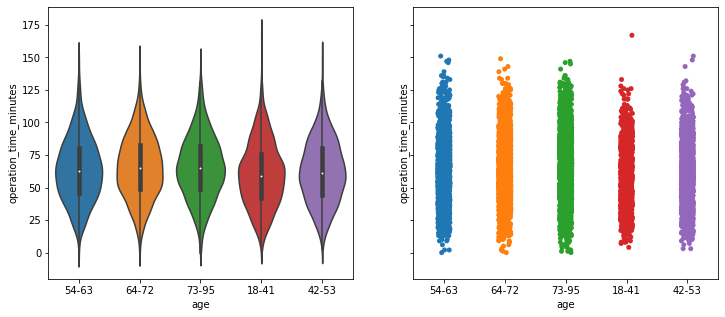

In [68]:
fig, ax =  plt.subplots(ncols=2, sharey=True, figsize =(12,5))
sns.violinplot(x='age', y='operation_time_minutes', data=data, ax=ax[0])
sns.stripplot(x='age', y='operation_time_minutes', data=data, ax=ax[1])

From the above results we could see that there is no specific relation between age and the duration of the surgery. No specific pattern could be observed between them

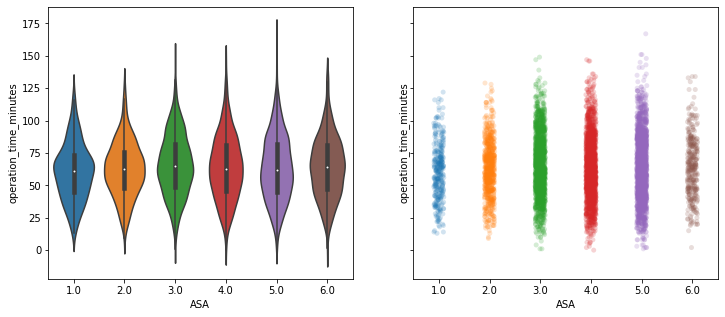

In [69]:
fig, ax =  plt.subplots(ncols=2, sharey=True, figsize =(12,5))
sns.violinplot(x='ASA', y='operation_time_minutes', data=data, ax=ax[0])
sns.stripplot(x='ASA', y='operation_time_minutes', data=data, alpha=0.2, jitter=True, ax=ax[1])

In [70]:
data.groupby(['allergy'])['operation_time_minutes'].mean()

allergy
ACRIDINE AZO DISINFECTANT DYE              42.0
ADENOSINE                                  75.0
ALBUMIN SOLUTION                           72.0
ALLERGIC DISORDER OF RESPIRATORY SYSTEM    82.0
ALLERGY TO ARTEMISIA VULGARIS              79.0
                                           ... 
TRYPTOPHAN                                 66.0
TULOBUTEROL                                77.0
VENLAFAXINE,  PRAZEPAM                     38.0
VERAPAMIL                                  51.0
XYLOMETAZOLINE                             44.0
Name: operation_time_minutes, Length: 101, dtype: float64

In [71]:
print("Operation time aggregrating ASA physical status classification system: {}\n".format(data.groupby(['ASA'])['operation_time_minutes'].mean()))
print("Operation time after aggregrating ICD codes: {}\n".format(data.groupby(['ICD10'])['operation_time_minutes'].mean()))
print("Operation time after aggregrating Classification of Interventions and Procedures: {}".format(data.groupby(['OPCS'])['operation_time_minutes'].mean()))

Operation time aggregrating ASA physical status classification system: ASA
1.0    60.721713
2.0    62.768678
3.0    65.942529
4.0    64.113902
5.0    63.702278
6.0    64.296512
Name: operation_time_minutes, dtype: float64

Operation time after aggregrating ICD codes: ICD10
A00     60.875000
A01     62.764706
A02     70.062500
A03     72.687500
A04     68.437500
          ...    
G96     55.416667
G97     61.000000
G98     60.666667
G99     81.714286
T200    63.000000
Name: operation_time_minutes, Length: 553, dtype: float64

Operation time after aggregrating Classification of Interventions and Procedures: OPCS
A01    62.250000
A02    58.875000
A03    72.111111
A04    74.600000
A05    67.692308
         ...    
L95    69.125000
L96    77.500000
L97    68.600000
L98    52.500000
L99    62.571429
Name: operation_time_minutes, Length: 682, dtype: float64


In [72]:
#temp = data.dropna().groupby(['ASA'])['operation_time_minutes']
#for name, group in temp:
#    print(name)
#    print(group.mean())

From the above plots it could be seen that `allergy,  blood loss, ICD, OPCS`  have high correlation with the `operation time`. There is higher probability that more severe is the disease or patient condition more time would be taken to perform the surgery. These features would be very helpful during prediction.
 


In [73]:
data['antibiotic_time'].dropna().head(1)

10    16:12:37
Name: antibiotic_time, dtype: object

In [74]:
#To split the time stamp into hour,minute and second column
def splitColumn_hour_Minute_sec(feature):
    temp_list = []
    data[feature].astype(str)
    convert_value = data[feature].dropna().str.split(':')
    for value in convert_value:
        temp_list.append([value[0],value[1],value[2]])
    new_value = pd.DataFrame(temp_list, columns=[str(feature)+'_H',str(feature)+'_M', str(feature)+'_Sec'])
    return new_value

In [75]:
split_antibiotic_time = splitColumn_hour_Minute_sec('antibiotic_time')

data['antibiotic_time_H'] = split_antibiotic_time['antibiotic_time_H']
data['antibiotic_time_M'] = split_antibiotic_time['antibiotic_time_M']
data['antibiotic_time_Sec'] = split_antibiotic_time['antibiotic_time_Sec']

In [76]:
split_operation_start_time = splitColumn_hour_Minute_sec('operation_start_time')
data['operation_start_time_H'] = split_operation_start_time['operation_start_time_H']
data['operation_start_time_M'] = split_operation_start_time['operation_start_time_M']
data['operation_start_time_Sec'] = split_operation_start_time['operation_start_time_Sec']

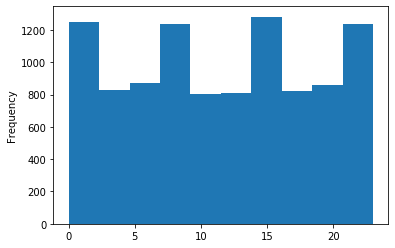

In [77]:
data['operation_start_time_H'] = data['operation_start_time_H'].astype('int',copy = True)
data['operation_start_time_H'].plot(kind= 'hist')
#data['operation_start_time_H'] = pd.to_numeric(data['operation_start_time_H'])


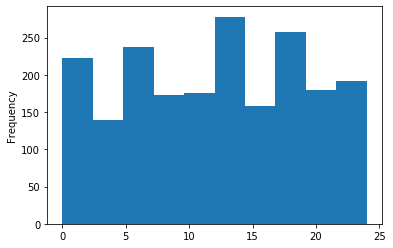

In [78]:
data['antibiotic_time_H'] = data['antibiotic_time_H'].dropna().astype('int',copy = True)
data['antibiotic_time_H'].plot(kind= 'hist')

In [79]:
# Bin the operation time variable into different groups and see if there is any pattern on when operation is performed
time_bins = [0,5,10,15,20,24]
data['operation_start_time_H_group'] = pd.cut(data.operation_start_time_H, time_bins)
data['antibiotic_time_H_group'] = pd.cut(data.antibiotic_time_H, time_bins)

In [80]:
temp = get_blood_loss('antibiotic_time_H_group', data)
temp.sort_values(by = ['Average Blood loss'])

,antibiotic_time_H_group,sample_size,Average Blood loss
3,"(5, 10]",437,265.409611
2,"(10, 15]",433,267.577367
4,"(20, 24]",273,277.831502
0,"(15, 20]",436,283.704128
1,"(0, 5]",367,286.920981


In [81]:
temp = get_blood_loss('operation_start_time_H_group', data)
temp.sort_values(by = ['Average Blood loss'])

,operation_start_time_H_group,sample_size,Average Blood loss
3,"(0, 5]",2073,191.679691
2,"(5, 10]",2080,246.627885
1,"(10, 15]",2027,287.780464
4,"(15, 20]",2137,341.002340
0,"(20, 24]",1239,371.223567


From the above results it could be seen that most of the operations are performed at `0-5 and 5-10' which are very early morning and morning time during which an operation is performed. 

In [82]:
result = data.ICD10.str.extract('([a-zA-Z]+)([^a-zA-Z]+)', expand=True)
result.columns = ['ICD10Text', 'ICD10Number']
data['ICD10Text'] = result['ICD10Text']
data['ICD10Number'] = result['ICD10Number']

In [83]:
result = data.OPCS.str.extract('([a-zA-Z]+)([^a-zA-Z]+)', expand=True)
result.columns = ['OPCSText', 'OPCSNumber']
data['OPCSText'] = result['OPCSText']
data['OPCSNumber'] = result['OPCSNumber']

In [84]:
data['blood loss (ml)'].mean()

275.9048953849234

In [85]:
data['operation_time_minutes'].mean()

64.2369

In [86]:
print(data.groupby('OPCSText')['blood loss (ml)'].mean().sort_values(ascending=False))
print(data.groupby('ICD10Text')['blood loss (ml)'].mean().sort_values(ascending=False))

OPCSText
G    527.768421
K    373.920886
B    322.727642
F    311.349127
A    291.348639
J    284.703100
L    278.961057
C    220.963455
H    149.954365
E    139.448155
D    127.994286
Name: blood loss (ml), dtype: float64
ICD10Text
B    366.397192
G    358.255507
A    357.853158
E    341.146132
T    252.194444
C    235.741591
F    140.675569
D    139.935012
Name: blood loss (ml), dtype: float64


In [87]:
print(data.groupby('OPCSNumber')['blood loss (ml)'].mean().sort_values(ascending=False))
print(data.groupby('ICD10Number')['blood loss (ml)'].mean().sort_values(ascending=False))

OPCSNumber
79    422.458333
63    418.482143
57    378.200000
82    370.866667
75    367.186047
         ...    
97    214.666667
92    210.500000
85    206.923077
98    193.307692
87    176.611111
Name: blood loss (ml), Length: 99, dtype: float64
ICD10Number
97    410.541667
87    378.317073
98    356.000000
94    351.287500
56    346.421687
         ...    
28    222.666667
91    221.600000
63    218.132353
14    211.722222
29    211.371429
Name: blood loss (ml), Length: 101, dtype: float64


In [88]:
print(data.groupby('OPCSNumber')['operation_time_minutes'].mean().sort_values(ascending=False))
print(data.groupby('ICD10Number')['operation_time_minutes'].mean().sort_values(ascending=False))

OPCSNumber
88    86.812500
96    77.500000
86    76.058824
90    74.500000
81    74.344828
        ...    
20    58.666667
13    58.348837
97    57.916667
92    57.291667
43    55.641509
Name: operation_time_minutes, Length: 99, dtype: float64
ICD10Number
54    70.822785
79    70.500000
56    69.975904
66    69.500000
55    68.635514
        ...    
01    59.078261
67    58.815789
59    58.040000
61    57.326087
29    54.828571
Name: operation_time_minutes, Length: 101, dtype: float64


In [89]:
print(data.groupby('OPCSText')['operation_time_minutes'].mean().sort_values(ascending=False))
print(data.groupby('ICD10Text')['operation_time_minutes'].mean().sort_values(ascending=False))

OPCSText
L    70.342142
G    70.079699
K    68.256329
C    67.313953
J    64.938010
B    64.491870
F    63.042394
A    62.989796
H    58.792079
D    56.875000
E    56.332162
Name: operation_time_minutes, dtype: float64
ICD10Text
A    67.529122
C    66.832105
E    66.284623
G    65.424009
B    64.618497
T    63.000000
F    60.022682
D    59.716139
Name: operation_time_minutes, dtype: float64


In [90]:
print(data.groupby('OPCSText')['operation_time_minutes'].mean().sort_values(ascending=False))
print(data.groupby('ICD10Text')['operation_time_minutes'].mean().sort_values(ascending=False))

OPCSText
L    70.342142
G    70.079699
K    68.256329
C    67.313953
J    64.938010
B    64.491870
F    63.042394
A    62.989796
H    58.792079
D    56.875000
E    56.332162
Name: operation_time_minutes, dtype: float64
ICD10Text
A    67.529122
C    66.832105
E    66.284623
G    65.424009
B    64.618497
T    63.000000
F    60.022682
D    59.716139
Name: operation_time_minutes, dtype: float64


In [91]:
allergy_list = []
for var in data['allergy'].unique():
    if (str(var) != 'nan'):
        new_word = var.split(",")
        if(len(new_word) > 1):
            #print(new_word)

            i = len(new_word)
            while(i):
                allergy_list.append(new_word[i-1])
                i-= 1
                #allergy_list.append(new_word[1])
        else:
            allergy_list.append(var)
allergy_list.remove('PLEASE SEE PAGE 05 OF THE PREASSESMENT BOOKLET')
#allergy_list

In [92]:
def allergyAnalyseFeature(df,feature,allergy_list):
    class_df = pd.DataFrame(columns=['allergyType', 'sample_size', feature])
    class_label_list = []
    featureValue_list = []
    sample_size_list = []
    for i in allergy_list:
        #print("*"*30)
        #print(i)
        count=0
        feature_total = 0
        for _, row in df.iterrows():
            if (pd.isna(row['allergy']) == False and pd.isna(row[feature]) == False ):
                #print(row['allergy'])
                new_val = row['allergy'].split(",")
                if(len(new_val) > 1):
                    k = len(new_val)
                    while(k):
                        temp = new_val[k-1]
                        #print(" in 1 {} --{}".format(temp,i))
                        if(temp == i):
                            #print("More than one allergy is there {} and count is {}".format(temp, count))
                            count += 1
                            feature_total += row[feature]
                        k-= 1
                else:
                    #print(" in 2 {} -- {}".format(new_val,i))
                    if i in new_val:
                        #print("allergy is not a list {} and feature value is {} and count is {}".format(new_val,row[feature],count))
                        count = count + 1
                        feature_total += row[feature]              
        if(count != 0):
            #print("Count is not zero and feature total is {}  and total count is{}".format(feature_total,count))
            class_label_list.append(i)
            featureValue_list.append(feature_total/count)
            sample_size_list.append(count)
            count = 0
            feature_total = 0
            
    #print("class_label_list {}".format(class_label_list))
    #print(sample_size_list)
    #print(featureValue_list)
    class_df['allergyType'] = class_label_list
    class_df['sample_size'] = sample_size_list
    class_df[feature] = featureValue_list
    return class_df


In [93]:
#df_analysed = allergyAnalyseFeature(data,'blood loss (ml)',allergy_list) 
#df_analysed.sort_values(by='blood loss (ml)', ascending=False)

In [94]:
#df_analysed = allergyAnalyseFeature(data,'operation_time_minutes',allergy_list) 
#df_analysed.sort_values(by='operation_time_minutes', ascending=False)

In [95]:
print("Mean blood loss is {}".format(data['blood loss (ml)'].mean()))
print("Mean operation time is {}".format(data['operation_time_minutes'].mean()))

Mean blood loss is 275.9048953849234
Mean operation time is 64.2369


We could see features `[age,operation_time]` individually aren't helpful in predicting the blood loss where as features `[gender,allergy, ASA, ICD10, OPCS, previous_surgery, antibiotic_time]` are useful in predicting the blood loss. After aggregrating into groups it could be seen that different groups have different blood loss for features allergy, ASA, ICD10 and OPCS.
 
For `ASA` physical status classification of 5.0 there is more blood loss of 1674 ml which means the patient is in a very criticial stage and it further reduces as the criticiality reduces. And for `allergy` the blood loss is more for 'ALLERGY TO ARTEMISIA VULGARIS' followed by 'ALLERGY TO DIAGNOSTIC AGENT'.
Similarly `ICD10, OPCS` there is more blood loss for codes E47 and G30 patients whereas it is least for G49 and B86 codes after grouping complete ICD10 and OPCS features. Also Could see that there is strong correlation between blodd loss and surgery time for the OPCS code G which is logged when a patient is admistted with UPPER DIGESTIVE TRACT whereas after aggregrating the ICD alphabet there is no correlation between blood loss and surgery time. For type A,B (Certain infectious and parasitic diseases) and  G (Diseases of the nervous system) there is more blood loss.

And finally if a patient is given `antibiotic_time`  it could be seen that there is more blood loss than without antibiotics given to a patient.


## Preprocessing

In [96]:
data_final = data[['age','gender','allergy','weight (kg)','ASA','ICD10','OPCS','previous_surgery','surgery_time_minutes','operation_time_minutes','blood loss (ml)',]]


In [97]:
data_final['weight (kg)'] = data_final['weight (kg)'].fillna(data_final['weight (kg)'].mean())
data_final['blood loss (ml)'] = data_final['blood loss (ml)'].fillna(data_final['blood loss (ml)'].mean())
data_final['allergy'] = data_final['allergy'].apply(lambda x: 'NO ALLERGY' if x is np.nan else x)
data_final['ASA'] = data_final['ASA'].fillna(9)
data_final['ICD10'] = data_final['ICD10'].fillna('na')
data_final['OPCS'] = data_final['OPCS'].fillna('na')

In [98]:
data_final = data_final[~data_final.surgery_time_minutes.isna()]
data_final = data_final[~data_final.age.isna()]

In [99]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7967 entries, 1 to 9997
Data columns (total 11 columns):
age                       7967 non-null object
gender                    7967 non-null object
allergy                   7967 non-null object
weight (kg)               7967 non-null float64
ASA                       7967 non-null float64
ICD10                     7967 non-null object
OPCS                      7967 non-null object
previous_surgery          7967 non-null bool
surgery_time_minutes      7967 non-null float64
operation_time_minutes    7967 non-null int64
blood loss (ml)           7967 non-null float64
dtypes: bool(1), float64(4), int64(1), object(5)
memory usage: 692.4+ KB


# References

https://www.ncbi.nlm.nih.gov/books/NBK442032/

https://www.bsac.org.uk/antimicrobialstewardshipebook/Chapter%2020/Surgical%20Prophylaxis.pdf

https://www.nhs.uk/conditions/having-surgery/

https://www.webmd.com/healthy-aging/what-expect-surgery#1

https://www.who.int/classifications/classification-of-diseases

https://en.wikipedia.org/wiki/OPCS-4

https://en.wikipedia.org/wiki/ASA_physical_status_classification_system

https://datasciencechalktalk.com/2019/09/02/handling-missing-values-with-missingo/

https://www.icd10data.com/ICD10CM/Codes

 
https://hscic.kahootz.com/gf2.ti/f/762498/46448197.2/PDF/-/National_Coding_Standards_OPCS4_reference_book_2019.pdf